In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r'C:\Users\cmcampos.REDESESCRIO\Desktop\Filmes Tera\projeto_filme_tera\bases_de_dados\dados_para_split_revenue.csv')

### MACHINE LEARNING

In [3]:
df['Budget ($million)'] = df['Budget ($million)'].astype(float)
df['Opening weekend ($million)'] = df['Opening weekend ($million)'].astype(float)

In [4]:
tipos_de_coluna = df.dtypes
print(tipos_de_coluna)

Budget ($million)              float64
Opening weekend ($million)     float64
Oscar Winners                    int64
Runtime (Minutes)              float64
Action                         float64
                                ...   
Director_William Brent Bell    float64
Director_Woody Allen           float64
Director_Yimou Zhang           float64
Director_Yorgos Lanthimos      float64
Director_Zack Snyder           float64
Length: 380, dtype: object


In [5]:
df

,Budget ($million),Opening weekend ($million),Oscar Winners,Runtime (Minutes),Action,Adventure,Animation,Biography,Comedy,Crime,...,Director_Wes Anderson,Director_Wes Ball,Director_Wes Craven,Director_Whit Stillman,Director_Will Gluck,Director_William Brent Bell,Director_Woody Allen,Director_Yimou Zhang,Director_Yorgos Lanthimos,Director_Zack Snyder
0,0.00,0.123360,0,118.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,8.111264,0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.50,13.270000,0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.50,37.134255,0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.00,40.010975,0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,60.00,3.704749,0,90.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,65.00,0.033336,0,129.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,50.00,0.130880,0,161.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,7.00,0.111200,0,119.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Load features and target data

In [6]:
y = df["Opening weekend ($million)"]
X = df.drop("Opening weekend ($million)", axis=1)

In [7]:
X

,Budget ($million),Oscar Winners,Runtime (Minutes),Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Director_Wes Anderson,Director_Wes Ball,Director_Wes Craven,Director_Whit Stillman,Director_Will Gluck,Director_William Brent Bell,Director_Woody Allen,Director_Yimou Zhang,Director_Yorgos Lanthimos,Director_Zack Snyder
0,0.00,0,118.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.50,0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.50,0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.00,0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,60.00,0,90.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,65.00,0,129.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,50.00,0,161.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,7.00,0,119.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separa os dados em treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 379) (379,)
(127, 379) (127,)


In [9]:
columns_to_scale = ["Budget ($million)", "Runtime (Minutes)"]

In [10]:
#Let's created an empty standard scalar object
scaler = StandardScaler()

In [11]:
#fit our input data, this will calculate the mean and standard deviation of each feature from unskilled inputs
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
X_train

array([[ 0.69164348, -0.26001083, -0.8353735 , ..., -0.05143445,
        -0.05143445, -0.05143445],
       [-1.01803034, -0.26001083,  0.1707914 , ..., -0.05143445,
        -0.05143445, -0.05143445],
       [ 2.1711689 , -0.26001083, -1.00306765, ..., -0.05143445,
        -0.05143445, -0.05143445],
       ...,
       [-0.78788194, -0.26001083, -0.22049495, ..., -0.05143445,
        -0.05143445, -0.05143445],
       [-0.7550036 , -0.26001083,  0.0589953 , ..., -0.05143445,
        -0.05143445, -0.05143445],
       [-0.73856443, -0.26001083, -0.4999852 , ..., -0.05143445,
        -0.05143445, -0.05143445]])

In [13]:
# Especifique o nome do arquivo onde você deseja salvar o scaler
nome_arquivo = "standard_scaler_com_diretor_revenue.pkl"

# Use a função joblib.dump para salvar o scaler
joblib.dump(scaler, nome_arquivo)

['standard_scaler_com_diretor_revenue.pkl']

Cria função pra avaliar os modelos

In [14]:
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    '''
    Avalia o desempenho de um modelo de regressão nos dados de treino e teste.

    Parâmetros:
    -----------
    model : objeto de modelo de regressão
        O modelo de regressão treinado a ser avaliado.

    X_train : array-like de forma (n_amostras, n_características)
        Os dados de entrada do treino.

    X_test : array-like de forma (n_amostras, n_características)
        Os dados de entrada do teste.

    y_train : array-like de forma (n_amostras,)
        Os dados de destino do treino.

    y_test : array-like de forma (n_amostras,)
        Os dados de destino do teste.

    Retorna:
    --------
    None
    '''
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("RESULTADOS DO TREINO: \n===============================")
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    print(f"ERRO QUADRÁTICO MÉDIO (MSE) NO TREINO: {mse_train:.4f}")
    print(f"R² NO TREINO: {r2_train:.4f}")

    print("RESULTADOS DO TESTE: \n===============================")
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"ERRO QUADRÁTICO MÉDIO (MSE) NO TESTE: {mse_test:.4f}")
    print(f"R² NO TESTE: {r2_test:.4f}")


Cria funções pra plotar gráficos de recall e precisão e ROC

In [15]:
def plot_evaluate_regression(model, X, y):
    '''
    Avalia o desempenho de um modelo de regressão.

    Parâmetros:
    -----------
    model : objeto de modelo de regressão
        O modelo de regressão treinado a ser avaliado.

    X : array-like de forma (n_amostras, n_características)
        Os dados de entrada.

    y : array-like de forma (n_amostras,)
        Os dados de destino.

    Retorna:
    --------
    None
    '''
    y_pred = model.predict(X)
    
    # Calcula o MSE e o R²
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plota um gráfico de dispersão
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title(f"Gráfico de Dispersão (MSE: {mse:.4f}, R²: {r2:.4f})")
    plt.show()
    
    print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
    print(f"Coeficiente de Determinação (R²): {r2:.4f}")

###  1. Regressão logística

In [16]:
print("\n=========LINEAR REGRESSION============")

from sklearn.linear_model import LinearRegression

# Cria um objeto de regressão linear
lr_reg = LinearRegression()

# Treina o modelo de regressão linear
lr_reg.fit(X_train, y_train)

# Avalia o desempenho do modelo
evaluate_regression(lr_reg, X_train, X_test, y_train, y_test)


=========LINEAR REGRESSION============
RESULTADOS DO TREINO: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TREINO: 54.6833
R² NO TREINO: 0.9411
RESULTADOS DO TESTE: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TESTE: 33413396287039572850795085824.0000
R² NO TESTE: -24641151472827330681896960.0000


Cria gráficos para avaliar precisão e recall

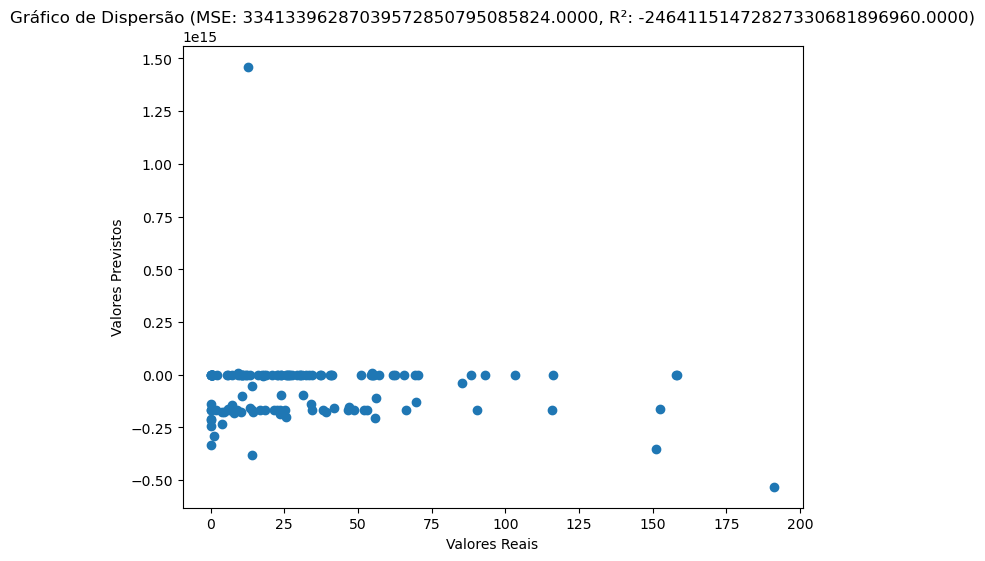

Erro Quadrático Médio (MSE): 33413396287039572850795085824.0000
Coeficiente de Determinação (R²): -24641151472827330681896960.0000


In [17]:
plot_evaluate_regression(lr_reg, X_test, y_test)

In [18]:
# Faça previsões nos dados de treinamento e teste
y_train_pred = lr_reg.predict(X_train)
y_test_pred = lr_reg.predict(X_test)

# Calcule as métricas de regressão
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Armazene as métricas em um dicionário
scores_dict = {
    'Linear Regression': {
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MSE': mse_test,
        'Test R²': r2_test,
    }
}

# Exiba as métricas
print(scores_dict)

{'Linear Regression': {'Train MSE': 54.68326710692029, 'Train R²': 0.9410903259834684, 'Test MSE': 3.3413396287039573e+28, 'Test R²': -2.464115147282733e+25}}


In [19]:
# Calcule as pontuações de validação cruzada
scores = cross_val_score(lr_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Converta as pontuações para o MSE positivo (neg_mean_squared_error retorna valores negativos)
mse_scores = -scores

# Exiba as pontuações e a média com desvio padrão
print(f"Scores de Validação Cruzada (MSE): {mse_scores}")
print(f"Cross-Validation MSE Médio: {mse_scores.mean()}")
print(f"Desvio Padrão: {mse_scores.std()}")

Scores de Validação Cruzada (MSE): [1.22437098e+31 8.18011819e+31 3.67088093e+30 9.27523780e+31
 9.04564893e+31 2.34881137e+31 6.46083400e+30 6.39381600e+31
 3.64485809e+31 6.18081756e+31]
Cross-Validation MSE Médio: 4.730685042195609e+31
Desvio Padrão: 3.3303285224110204e+31


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Defina os hiperparâmetros que você deseja otimizar
n_estimators = [5, 10, 50, 100, 500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Crie um objeto de regressão da Random Forest
rf_reg = RandomForestRegressor(random_state=20)

# Crie um objeto GridSearchCV para otimizar os hiperparâmetros
rf_cv = GridSearchCV(rf_reg, params_grid, scoring="neg_mean_squared_error", cv=5, verbose=1, n_jobs=-1)

# Execute a pesquisa em grade
rf_cv.fit(X_train, y_train)

# Obtenha os melhores parâmetros encontrados
best_params = rf_cv.best_params_
print(f"Melhores parâmetros: {best_params}")

# Crie um novo objeto de Random Forest com os melhores parâmetros encontrados
rf_reg = RandomForestRegressor(**best_params)

# Treine o modelo Random Forest
rf_reg.fit(X_train, y_train)

# Avalie o desempenho do modelo
evaluate_regression(rf_reg, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Melhores parâmetros: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
RESULTADOS DO TREINO: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TREINO: 243.5803
R² NO TREINO: 0.7376
RESULTADOS DO TESTE: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TESTE: 848.5733
R² NO TESTE: 0.3742


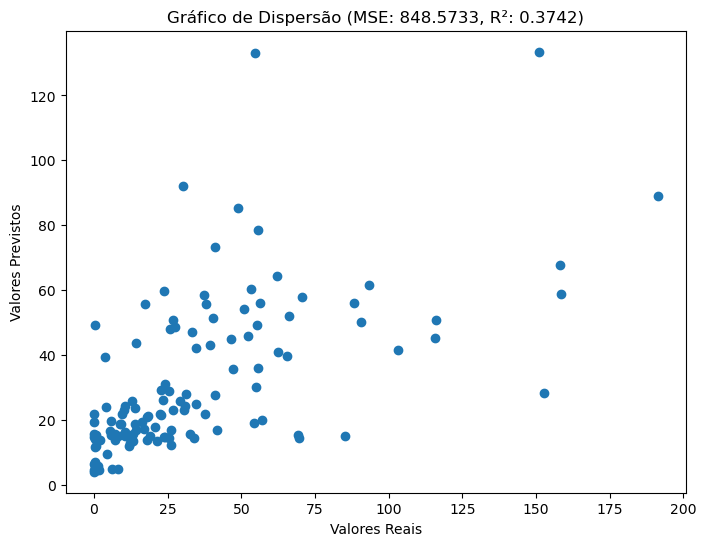

Erro Quadrático Médio (MSE): 848.5733
Coeficiente de Determinação (R²): 0.3742


In [21]:
plot_evaluate_regression(rf_reg, X_test, y_test)

In [22]:
# Faça previsões nos dados de treinamento e teste
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Calcule as métricas de regressão
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Armazene as métricas em um dicionário
scores_dict = {
    'Linear Regression': {
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MSE': mse_test,
        'Test R²': r2_test,
    }
}

# Exiba as métricas
print(scores_dict)

{'Linear Regression': {'Train MSE': 243.58030124457716, 'Train R²': 0.7375936570302202, 'Test MSE': 848.5733421817672, 'Test R²': 0.374208354012346}}


In [23]:
# Calcule as pontuações de validação cruzada
scores = cross_val_score(rf_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Converta as pontuações para o MSE positivo (neg_mean_squared_error retorna valores negativos)
mse_scores = -scores

# Exiba as pontuações e a média com desvio padrão
print(f"Scores de Validação Cruzada (MSE): {mse_scores}")
print(f"Cross-Validation MSE Médio: {mse_scores.mean()}")
print(f"Desvio Padrão: {mse_scores.std()}")

c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

Scores de Validação Cruzada (MSE): [1002.70171032  987.37362616  325.21943807  297.1758768   530.1382704
  297.27950571  405.18316194  268.30986551  176.53207818  242.73836683]
Cross-Validation MSE Médio: 453.26518999302726
Desvio Padrão: 285.58291542700033


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### Gradient Boosting regression

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defina os hiperparâmetros que você deseja otimizar
n_estimators = [50, 100, 250]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

# Crie um objeto XGBoost para regressão
xgb_reg = GradientBoostingRegressor(random_state=20)

# Crie um objeto GridSearchCV para otimizar os hiperparâmetros
xgb_cv = GridSearchCV(xgb_reg, params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Execute a pesquisa em grade
xgb_cv.fit(X_train, y_train)

# Obtenha os melhores parâmetros encontrados
best_params = xgb_cv.best_params_
print(f"Melhores parâmetros: {best_params}")

# Crie um novo objeto XGBoost com os melhores parâmetros encontrados
xgb_reg = xgb.XGBRegressor(**best_params)

# Treine o modelo XGBoost para regressão
xgb_reg.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = xgb_reg.predict(X_test)

# Avalie o desempenho do modelo para regressão
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


# Avalie o desempenho do modelo
evaluate_regression(xgb_cv, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
[11:35:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Erro Quadrático Médio (MSE): 823.5702952917367
Coeficiente de Determinação (R²): 0.3926471819724483
RESULTADOS DO TREINO: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TREINO: 322.2297
R² NO TREINO: 0.6529
RESULTADOS DO TESTE: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TESTE: 832.4633
R² NO TESTE: 0.3861


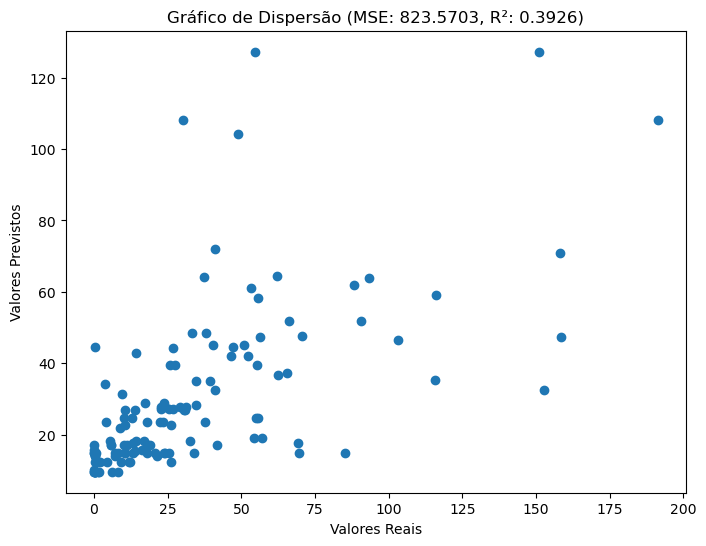

Erro Quadrático Médio (MSE): 823.5703
Coeficiente de Determinação (R²): 0.3926


In [25]:
plot_evaluate_regression(xgb_reg, X_test, y_test)

In [26]:
# Faça previsões nos dados de treinamento e teste
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

# Calcule as métricas de regressão
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Armazene as métricas em um dicionário
scores_dict = {
    'Linear Regression': {
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MSE': mse_test,
        'Test R²': r2_test,
    }
}

# Exiba as métricas
print(scores_dict)

{'Linear Regression': {'Train MSE': 259.91641233888413, 'Train R²': 0.7199949466718611, 'Test MSE': 823.5702952917367, 'Test R²': 0.3926471819724483}}


In [27]:
# Calcule as pontuações de validação cruzada
scores = cross_val_score(xgb_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Converta as pontuações para o MSE positivo (neg_mean_squared_error retorna valores negativos)
mse_scores = -scores

# Exiba as pontuações e a média com desvio padrão
print(f"Scores de Validação Cruzada (MSE): {mse_scores}")
print(f"Cross-Validation MSE Médio: {mse_scores.mean()}")
print(f"Desvio Padrão: {mse_scores.std()}")

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[11:35:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_sample

### Support Vector Machine

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defina os hiperparâmetros que você deseja otimizar
param_grid = {
    'C': [60, 70, 75, 65],
    'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007],
    'kernel': ['rbf', 'poly', 'linear'],
}

# Crie um objeto SVR (Support Vector Regressor)
svm_reg = SVR()

# Crie um objeto GridSearchCV para otimizar os hiperparâmetros
svm_cv = GridSearchCV(svm_reg, param_grid, scoring='neg_mean_squared_error', verbose=1, cv=5)

# Execute a pesquisa em grade
svm_cv.fit(X_train, y_train)

# Obtenha os melhores parâmetros encontrados
best_params = svm_cv.best_params_
print(f"Melhores parâmetros: {best_params}")

# Crie um novo objeto SVR com os melhores parâmetros encontrados
svm_reg = SVR(**best_params)

# Treine o modelo SVR para regressão
svm_reg.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = svm_reg.predict(X_test)

# Avalie o desempenho do modelo para regressão
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

evaluate_regression(svm_reg, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Melhores parâmetros: {'C': 75, 'gamma': 0.0009, 'kernel': 'rbf'}
Erro Quadrático Médio (MSE): 894.9530466634226
Coeficiente de Determinação (R²): 0.34000502689229706
RESULTADOS DO TREINO: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TREINO: 220.5833
R² NO TREINO: 0.7624
RESULTADOS DO TESTE: 
ERRO QUADRÁTICO MÉDIO (MSE) NO TESTE: 894.9530
R² NO TESTE: 0.3400


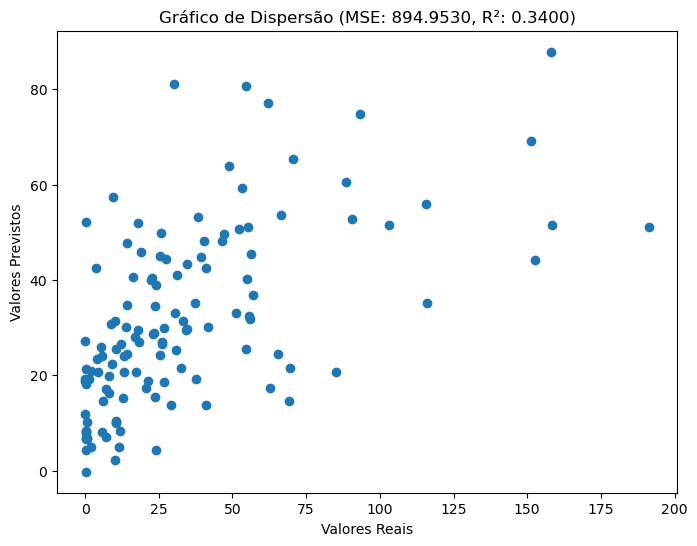

Erro Quadrático Médio (MSE): 894.9530
Coeficiente de Determinação (R²): 0.3400


In [29]:
plot_evaluate_regression(svm_reg, X_test, y_test)

In [30]:
# Faça previsões nos dados de treinamento e teste
y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)

# Calcule as métricas de regressão
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Armazene as métricas em um dicionário
scores_dict = {
    'Linear Regression': {
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MSE': mse_test,
        'Test R²': r2_test,
    }
}

# Exiba as métricas
print(scores_dict)

{'Linear Regression': {'Train MSE': 220.5833448189746, 'Train R²': 0.7623680218053852, 'Test MSE': 894.9530466634226, 'Test R²': 0.34000502689229706}}


In [31]:
# Calcule as pontuações de validação cruzada
scores = cross_val_score(svm_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Converta as pontuações para o MSE positivo (neg_mean_squared_error retorna valores negativos)
mse_scores = -scores

# Exiba as pontuações e a média com desvio padrão
print(f"Scores de Validação Cruzada (MSE): {mse_scores}")
print(f"Cross-Validation MSE Médio: {mse_scores.mean()}")
print(f"Desvio Padrão: {mse_scores.std()}")

Scores de Validação Cruzada (MSE): [1181.36137005 1138.23398104  267.7296492   440.54210973  807.7826657
  348.90488216  474.47877354  305.41914791  236.34874173  495.51687645]
Cross-Validation MSE Médio: 569.6318197511929
Desvio Padrão: 332.5958228592512


## Comparação entre os modelos

Load models

In [32]:
#import pickle

#with open('models/lr_clf', 'rb') as file:
#    lr_clf = pickle.load(file)

#with open('models/Rf_clf', 'rb') as file:
#    rf_clf = pickle.load(file)

#with open('models/Xgb_clf', 'rb') as file:
#    xgb_clf = pickle.load(file)

#with open('models/svm_clf', 'rb') as file:
#    svm_clf = pickle.load(file)

In [33]:
from sklearn.metrics import r2_score

# Dicionário de modelos de regressão
regression_models = {
    'Linear Regression': lr_reg,
    'Random Forest Regressor': rf_reg,
    'XGBoost Regressor': xgb_reg,
    'Support Vector Regressor': svm_reg
}

for model_name, model in regression_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: R² = {r2:.3f}")

Linear Regression: R² = -24641151472827330681896960.000
Random Forest Regressor: R² = 0.374
XGBoost Regressor: R² = 0.393
Support Vector Regressor: R² = 0.340


## Salvar modelos

In [34]:
with open('lr_reg.pkl', 'wb') as file:
    pickle.dump(lr_reg, file)

with open('Rf_reg.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

with open('Xgb_reg.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

with open('svm_reg.pkl', 'wb') as file:
    pickle.dump(svm_reg, file)


## SHAP

Load models

In [35]:
from sklearn.metrics import r2_score

def get_best_regression_model(regression_models, X_test, y_test):
    """
    Retorna o nome do modelo de regressão com o maior R² a partir de um dicionário de modelos de regressão previamente treinados.

    Parâmetros:
    regression_models (dict): Um dicionário de modelos de regressão previamente treinados, onde as chaves são os nomes dos modelos e os valores são os modelos treinados.
    X_test (array): Um array NumPy de tamanho (n_samples, n_features) contendo os dados de teste.
    y_test (array): Um array NumPy de tamanho (n_samples,) contendo os rótulos correspondentes aos dados de teste.

    Retorna:
    O nome do modelo de regressão com o maior R².

    """
    best_r2 = -float('inf')  # valor inicial para comparar os R²
    best_model_name = None  # valor inicial para guardar o nome do melhor modelo
    for model_name, model in regression_models.items():
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_model_name = model_name
    return best_model_name

best_regression_model = get_best_regression_model(regression_models, X_test, y_test)
print("O melhor modelo de regressão é:", best_regression_model)


O melhor modelo de regressão é: XGBoost Regressor
